In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Input, Conv2D, Convolution3D, MaxPool2D, Dense, Dropout, Flatten, Activation

#### data preparation

In [0]:
from keras.datasets import cifar10

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [34]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [35]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [0]:
# convert the label into one hot encoded
y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)

In [0]:
x_train = x_train/255.0
x_test = x_test/255.0

### CNN Model

In [48]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape = (32, 32, 3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))


## compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
dropout_7 (Dropout)          (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 10, 10, 64)        102464    
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 6, 6, 64)          102464    
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 4, 4, 32)          18464     
__________

In [0]:
# data augmentation
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    

In [50]:
# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

# Fit the model on the batches generated by datagen.flow().
model.fit_generator(datagen.flow(x_train, y_train, batch_size=256), epochs=50, validation_data=(x_test, y_test),steps_per_epoch=256)

Epoch 1/50
256/256 [==============================] - 27s 104ms/step - loss: 1.8415 - acc: 0.3000 - val_loss: 1.6512 - val_acc: 0.3872
Epoch 2/50
256/256 [==============================] - 26s 100ms/step - loss: 1.4686 - acc: 0.4586 - val_loss: 1.3432 - val_acc: 0.5000
Epoch 3/50
256/256 [==============================] - 26s 100ms/step - loss: 1.2997 - acc: 0.5263 - val_loss: 1.1775 - val_acc: 0.5787
Epoch 4/50
256/256 [==============================] - 26s 100ms/step - loss: 1.1943 - acc: 0.5689 - val_loss: 1.1703 - val_acc: 0.5728
Epoch 5/50
256/256 [==============================] - 26s 100ms/step - loss: 1.1239 - acc: 0.5943 - val_loss: 1.1003 - val_acc: 0.6005
Epoch 6/50
256/256 [==============================] - 26s 100ms/step - loss: 1.0545 - acc: 0.6197 - val_loss: 1.0180 - val_acc: 0.6339
Epoch 7/50
256/256 [==============================] - 26s 100ms/step - loss: 1.0057 - acc: 0.6403 - val_loss: 1.0192 - val_acc: 0.6456
Epoch 8/50
256/256 [==============================] - 2

In [0]:
hist = model.history

In [0]:
def plot_loss_accuracy():
  # plot loss
  print("training_loss =", hist.history['loss'][-1],  "   val_loss =", hist.history['val_loss'][-1])
  print("training_acc =", hist.history['acc'][-1]*100, "   val_acc =", hist.history['val_acc'][-1]*100)
  plt.plot(hist.history['val_loss'], label='val_loss')
  plt.plot(hist.history['loss'], label='training_loss')

  # plot accuracy
  plt.plot(hist.history['val_acc'], label='val_acc')
  plt.plot(hist.history['acc'], label='training_acc')
  plt.legend()
  plt.show()


training_loss = 0.5398567504223295    val_loss = 0.608846135854721
training_acc = 81.12301101737098    val_acc = 79.5


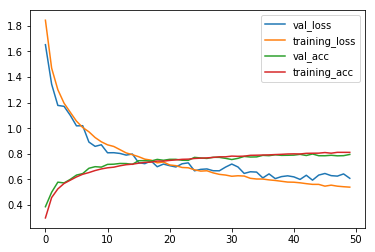

In [54]:
plot_loss_accuracy()